# Obesity Level Prediction

## Data Dictionary 

**Demographic information about the respondents**
 - Gender : A person's gender
 - Age : The length of time that a person has lived
 - Height : The distance from the bottom of the feet to the top of the head in a human body
 - Weight : A person's mass or weight

**Historical Information**
- Family History with Overweight : Has a family member suffered or suffers from overweight?

**Eating Habits**
- CALC : Alcohol consumption 
- SCC : Calories consumption 
- CH2O : Water drinking habit
- FAVC : Caloric food consumption 
- FCVC : Vegetable Consumption
- NCP : daily count of Main meal 
- CAEC : Food between meals 

**Physical Condition**
- MTRANS : transportation used
- TUE : Use of technological devices
- FAF : frequency of pyhsical activities
- SMOKE : Are you a smoker

## Hypothesis 

**Based on Demographics**
- Are Females more likely to be obessed than Males based on eating habits and physical conditions
- Are Males more likely to be obessed than Females based on eating habits and physical conditions
- Are older people more likely to be obessed than younger ones
- Does the weight and height of a person affect their likelihood to be obessed 
- Does obesity in family history increase obesity levels

## Descriptive Statistics 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Data cleanup

In [2]:
df = pd.read_csv('/Users/mac/Documents/USD/Applied-AI-Group-Projects/obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#data cleanup - renamed column with better naming convention
df.rename(columns = {'Gender': 'gender'}, inplace = True)
df.rename(columns = {'Age': 'age'}, inplace = True)
df.rename(columns = {'Height': 'height'}, inplace = True)
df.rename(columns = {'Weight': 'weight'}, inplace = True)
df.rename(columns = {'family_history_with_overweight': 'famHistOverweight'}, inplace = True)
df.rename(columns = {'FAVC': 'highCalFood'}, inplace = True)
df.rename(columns = {'FCVC': 'veggies'}, inplace = True)
df.rename(columns = {'NCP': 'numMealsPerDay'}, inplace = True)
df.rename(columns = {'CAEC': 'foodBetweenMeals'}, inplace = True)
df.rename(columns = {'SMOKE': 'smoke'}, inplace = True)
df.rename(columns = {'CH2O': 'h20PerDay'}, inplace = True)
df.rename(columns = {'SCC': 'trackCals'}, inplace = True)
df.rename(columns = {'FAF': 'physActiFreq'}, inplace = True)
df.rename(columns = {'TUE': 'techFreq'}, inplace = True)
df.rename(columns = {'CALC': 'alcFreq'}, inplace = True)
df.rename(columns = {'MTRANS': 'transp'}, inplace = True)
df.rename(columns = {'NObeyesdad': 'obesityLvl'}, inplace = True)

#display first 5 values
df.head(5)

,gender,age,height,weight,famHistOverweight,highCalFood,veggies,numMealsPerDay,foodBetweenMeals,smoke,h20PerDay,trackCals,physActiFreq,techFreq,alcFreq,transp,obesityLvl
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.isnull().sum() # check for null values

gender               0
age                  0
height               0
weight               0
famHistOverweight    0
highCalFood          0
veggies              0
numMealsPerDay       0
foodBetweenMeals     0
smoke                0
h20PerDay            0
trackCals            0
physActiFreq         0
techFreq             0
alcFreq              0
transp               0
obesityLvl           0
dtype: int64

The dataset does not have null values 

In [6]:
df.describe()

,age,height,weight,veggies,numMealsPerDay,h20PerDay,physActiFreq,techFreq
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


- The dataset primarily consists of young adults, with the age distribution skewed toward younger individuals (most between 20-26 years, but a maximum of 61 years). Heights are fairly normally distributed around a mean of 1.70m, with a standard deviation of 0.093m, indicating slight variations. Weight, however, shows a broader distribution, ranging from 39 kg to 173 kg, with a higher standard deviation (26.19 kg), suggesting significant variability in body composition.


- Most individuals consume 2-3 meals per day, with water intake averaging around 2 liters per day. Vegetable consumption is fairly consistent, clustering around 2-3 servings daily. Physical activity is skewed towards inactivity, with a median value of 1 session per week, and technology usage follows a similar trend, with many individuals spending minimal time on tech-related activities. The distribution of physical activity and technology use suggests that some individuals are highly active, while others are mostly sedentary. These insights highlight potential health risks and lifestyle trends, which could be further analyzed for correlations between weight, diet, and activity levels.

In [7]:
print(df['gender'].value_counts(), "\n")
print(df['foodBetweenMeals'].value_counts(), "\n")
print(df['alcFreq'].value_counts(), "\n")
print(df['transp'].value_counts(), "\n")
print(df['obesityLvl'].value_counts())

gender
Male      1068
Female    1043
Name: count, dtype: int64 

foodBetweenMeals
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64 

alcFreq
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64 

transp
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64 

obesityLvl
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


- The dataset has a nearly equal gender distribution (1,068 males and 1,043 females). 

- Most individuals consume snacks between meals (83.6%), with the majority doing so "sometimes" (1765 people). 

- Alcohol consumption is common, with 66.4% drinking "sometimes", while very few drink frequently or always. 

- Public transportation (74.9%) is the most used mode of transport, followed by automobiles (21.7%). Obesity is prevalent, with over half of the individuals classified as overweight or obese (1,262 people in total), while only 287 are of normal weight and 272 are underweight, indicating potential public health concerns related to lifestyle choices.

## Boxplots for nominal data

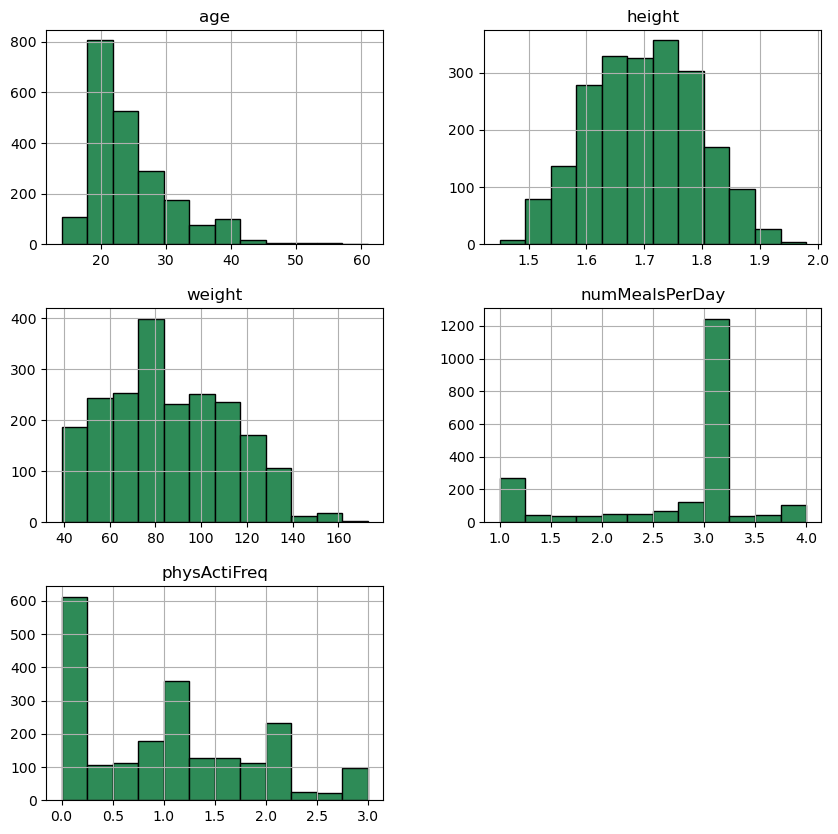

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


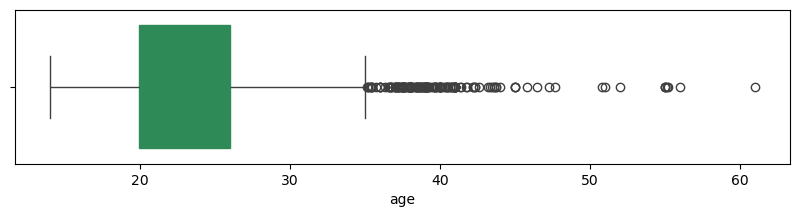

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


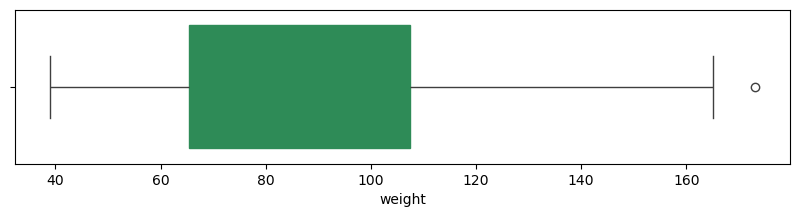

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


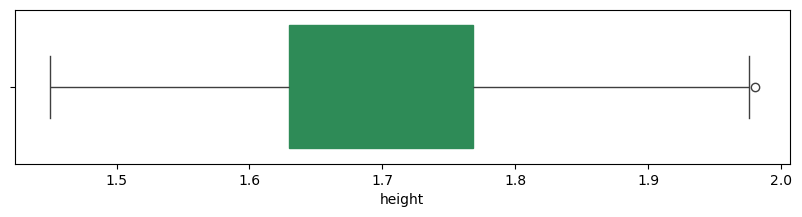

In [8]:
#Printed boxplots to show the distribution of nominal data
df[['age', 'height', 'weight', 'numMealsPerDay', 'physActiFreq']].hist(bins = 12, edgecolor = 'black', color = 'seagreen', figsize = (10, 10))
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x=df['age'], boxprops=dict(color='seagreen'), medianprops=dict(color='seagreen'))
plt.show()
plt.figure(figsize=(10,2))
sns.boxplot(x=df['weight'], boxprops=dict(color='seagreen'), medianprops=dict(color='seagreen'))
plt.show()
plt.figure(figsize=(10,2))
sns.boxplot(x=df['height'], boxprops=dict(color='seagreen'), medianprops=dict(color='seagreen'))
plt.show()

The boxplot on age shows age distribution is right-skewed, with most individuals aged between 15 and 30, while numerous outliers beyond 35 suggest a smaller number of older participants.

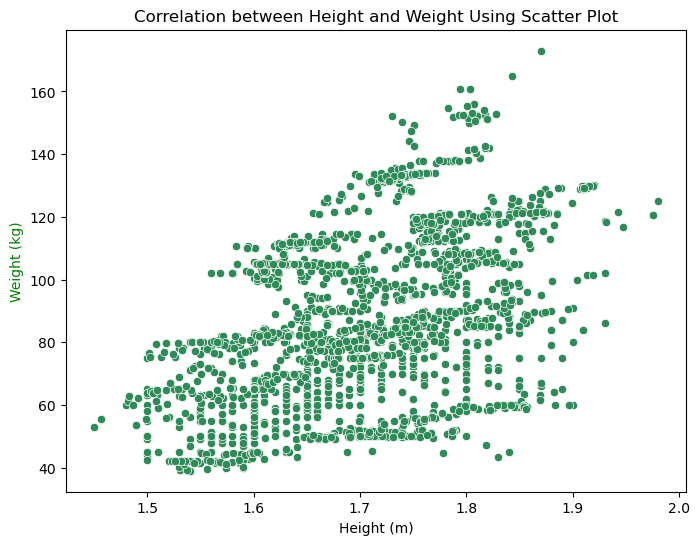

In [ ]:
df2 = pd.read_csv('obesity.csv')

#data cleanup - renamed columns
df2.rename(columns = {'Gender': 'gender'}, inplace = True)
df2.rename(columns = {'Age': 'age'}, inplace = True)
df2.rename(columns = {'Height': 'height'}, inplace = True)
df2.rename(columns = {'Weight': 'weight'}, inplace = True)
df2.rename(columns = {'family_history_with_overweight': 'famHistOverweight'}, inplace = True)
df2.rename(columns = {'FAVC': 'highCalFood'}, inplace = True)
df2.rename(columns = {'FCVC': 'veggies'}, inplace = True)
df2.rename(columns = {'NCP': 'numMealsPerDay'}, inplace = True)
df2.rename(columns = {'CAEC': 'foodBetweenMeals'}, inplace = True)
df2.rename(columns = {'SMOKE': 'smoke'}, inplace = True)
df2.rename(columns = {'CH2O': 'h20PerDay'}, inplace = True)
df2.rename(columns = {'SCC': 'trackCals'}, inplace = True)
df2.rename(columns = {'FAF': 'physActiFreq'}, inplace = True)
df2.rename(columns = {'TUE': 'techFreq'}, inplace = True)
df2.rename(columns = {'CALC': 'alcFreq'}, inplace = True)
df2.rename(columns = {'MTRANS': 'transp'}, inplace = True)
df2.rename(columns = {'NObeyesdad': 'obesityLvl'}, inplace = True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['height'], y=df2['weight'], color='seagreen')
plt.title('Correlation between Height and Weight Using Scatter Plot', color='black')
plt.xlabel('Height (m)', color='black')
plt.ylabel('Weight (kg)', color='green')
plt.show()

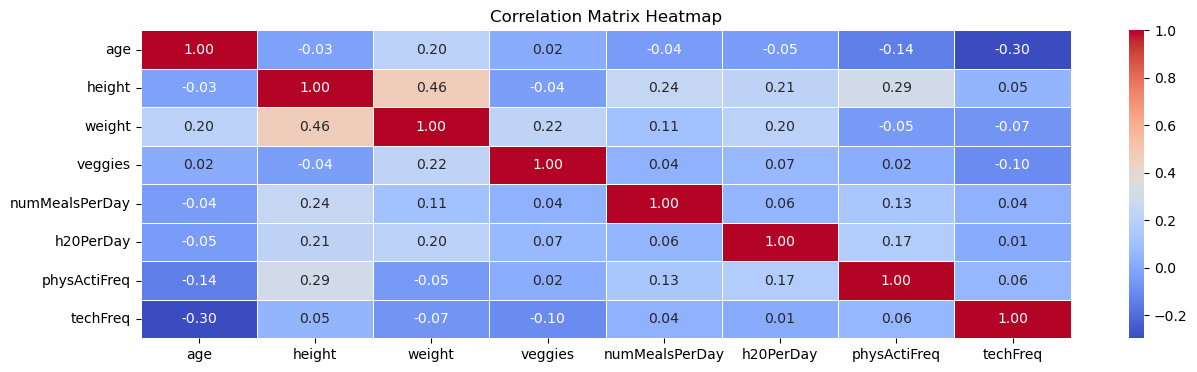

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(15, 4))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

This correlation matrix clearly reveals that there is no multicollinearity between weight and height

In [20]:
df.head()

,gender,age,height,weight,famHistOverweight,highCalFood,veggies,numMealsPerDay,foodBetweenMeals,smoke,h20PerDay,trackCals,physActiFreq,techFreq,alcFreq,transp,obesityLvl
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Create Pivot Table
pivot_table = df.pivot_table(
    values=['age', 'height', 'weight', 'veggies', 'numMealsPerDay', 'h20PerDay', 'physActiFreq', 'techFreq'], 
    index=['obesityLvl'],  # Group by obesity level
    columns=['gender'],  # Multivariate segmentation
    aggfunc='mean'  # Compute mean values
)

# Display the table in a better format
pivot_table = pivot_table.round(2)  # Round values for readability
display(pivot_table.style.format("{:.2f}").set_caption("Multivariate Analysis of Obesity Dataset"))



Findings from the Multivariate analysis for variables across gender and obesity levels shows that for;

- **Age Distribution**: Young individuals (18-20 years old) tend to be underweight, indicating possible metabolic or nutritional factors. While Obesity is more common in slightly older individuals (22 - 27 years old).

- **Water Intake (CH2O)**: Lower water intake may be linked to obesity, possibly due to poor hydration habits affecting metabolism. As Obese individuals (Type I, II, III) consume less water than normal or overweight individuals. Higher CH2O values are seen in insufficient weight and normal weight groups.

- **Physical Activity (FAF)** : Physically active individuals(FAF > 2.0) are mostly normal or underweight, while obese individuals, especially Type II & III, have lower activity levels, with males generally being more active than females across all obesity categories. 

- **Vegetable Consumption Frequency (FCVC)**: Obese individuals have lower FCVC values(e.g., Obesity Type I: 2.22, 2.16, obesity_Type : 2.17,2.23 etc), while normal and underweight individuals tend to have higher vegetable consumption closer to 3.0

- **Number of Meals per Day (NCP)** : Obese individuals (Type III) tend to eat more frequently (NCP = 3.00), while underweight individuals have lower meal frequency (NCP ≈ 2.66), likely due to lower calorie intake.

- **Screen Time (TUE)**: Obesity Type III individuals have higher TUE values (up to 1.00), indicating more sedentary time, while underweight and normal-weight individuals have lower TUE values (~0.67)

- **Weight Distribution**: Weight increases progressively from normal to overweight to obesity, with Obesity Type III individuals having the highest weights (Females: 120.78 kg, Males: 173.00 kg) and underweight individuals the lowest (Females: 46.69 kg, Males: 55.53 kg)


`INSIGHTS `
- Gender differences exist, with males generally having higher FAF and weight values

- Obese individuals tend to have lower FAF, CH2O, and FCVC values but higher screen time (TUE) and meal frequency (NCP)

- Lower physical activity correlates with higher obesity levels. Regular exercise is key to maintaining a healthy weight.

- Height doesn’t significantly impact obesity classification, but weight gain patterns vary across individuals.

- Frequent eating does not necessarily lead to obesity, but meal composition and portion size could be factors.

- More screen time is associated with higher obesity levels, indicating the role of sedentary lifestyles.

- Obesity is strongly correlated with higher body weight, reinforcing the importance of weight management.


In [24]:
import pandas as pd

# Create Pivot Table
pivot_table = df.pivot_table(
    values=['age', 'height', 'weight', 'veggies', 'numMealsPerDay', 'h20PerDay', 'physActiFreq', 'techFreq'], 
    index=['obesityLvl'],  # Group by obesity level
    columns=['famHistOverweight'],  # family history segmentation
    aggfunc='mean'  # Compute mean values
)

# Display the table in a better format
pivot_table = pivot_table.round(2)  # Round values for readability
display(pivot_table.style.format("{:.2f}").set_caption("Multivariate Analysis of Obesity Dataset"))




`INSIGHTS `

- Family history of overweight is associated with higher weight values across all obesity categories.

- Age increases progressively from normal weight to obesity, with overweight individuals being the oldest.

- Lower physical activity and higher sedentary time (TUE) are strong indicators of obesity.

- Frequent eating (high NCP) is a common trait in obese individuals, while underweight individuals eat less frequently.

- Hydration levels (CH2O) do not show a strong relationship with obesity status.

In [26]:
# Create Pivot Table
pivot_table = df.pivot_table(
    values=['age', 'height', 'weight', 'veggies', 'numMealsPerDay', 'h20PerDay', 'physActiFreq', 'techFreq'],
    index=['obesityLvl'],  # Group by obesity level
    columns=['alcFreq'],  # segmentation
    aggfunc='mean'  # Compute mean values
)

# Display the table in a better format
pivot_table = pivot_table.round(2)  # Round values for readability
display(pivot_table.style.format("{:.2f}").set_caption("Multivariate Analysis of Obesity Dataset"))



The analysis from the table above explores the relationship between alcohol consumption (CALC: Always, Frequently, Sometimes, No) and various lifestyle and physiological factors associated with obesity levels

`INSIGHT`

- Frequent alcohol consumers tend to have higher weight, especially in obese categories.

- Alcohol consumption correlates with higher physical activity (FAF) and meal frequency (NCP), suggesting that drinkers may lead more socially active lifestyles.

- There is no clear relationship between alcohol consumption and sedentary behavior (TUE), but normal-weight frequent drinkers tend to spend more time on screens.

- Older individuals are more likely to drink frequently, while younger individuals (especially underweight ones) drink less often.

# Preprocessing Categorical Variables ( Feature Egineering)



To prepare the data for modelling, categorical features like 'Gender', 'family history with overweight', 'FAVC', 'CAEC', 'CALC', 'SMOKE', 'SCC', 'transp' and target variable 'obesityLvl' are encoded using label encoding to change them to numerical values. 

**Feature Encoding** : Before applying Linear models like logistic regression, data needs to be scaled to keep all features strictly numerical 

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'famHistOverweight', 'highCalFood', 'foodBetweenMeals', 'smoke', 'trackCals', 'alcFreq', 'transp', 'obesityLvl']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
df.head(5)

,gender,age,height,weight,famHistOverweight,highCalFood,veggies,numMealsPerDay,foodBetweenMeals,smoke,h20PerDay,trackCals,physActiFreq,techFreq,alcFreq,transp,obesityLvl
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


### Feature Scaling for Independent variables 

This step in data Pre Processing is applied to independent variables or features of the data observations, to help normalize the data within a particular range of similar values. To ensure fair contribution of individual features in the obesity dataset we employ feature scaling to reduce bias towards features with larger values. Sometimes, it also helps in speeding up the calculations in an algorithm.

**Standard scalar** was used as our dataset has a normal distribution and standardscalar is best suited for normal distribution.

In [29]:
cols = ['age', 'height', 'weight', 'veggies', 'numMealsPerDay', 'h20PerDay', 'physActiFreq', 'techFreq']

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cols] = st.fit_transform(df[cols])

In [30]:
df.head()

,gender,age,height,weight,famHistOverweight,highCalFood,veggies,numMealsPerDay,foodBetweenMeals,smoke,h20PerDay,trackCals,physActiFreq,techFreq,alcFreq,transp,obesityLvl
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


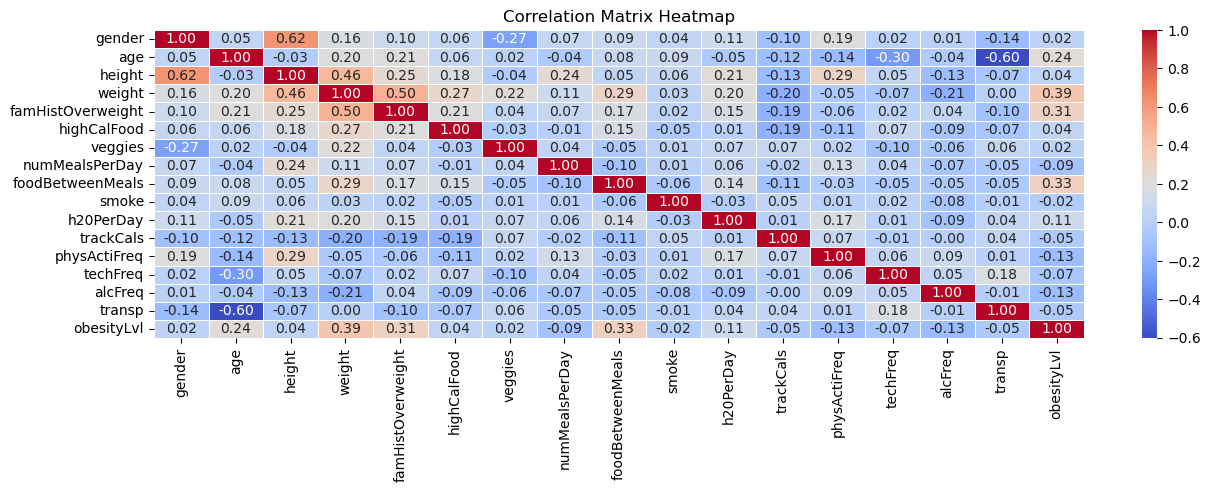

In [31]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(15, 4))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

Based on this correlation heatmap, 
- Some features show moderate correlation e.g., Gender vs. Height (0.62), Weight vs. Height (0.46), and famHistOverweight vs. NObeyesdad (0.31).
- Most features do not exhibit strong multicollinearity (high correlations close to 1 or -1), meaning they are relatively independent.

### Split target (Dependent) variable from response variables (Independent)

In [32]:
from sklearn.utils import shuffle

df = shuffle(df, random_state = 42)
X = df.drop('obesityLvl', axis=1) # response variables
y = df['obesityLvl'] # target vector variable y

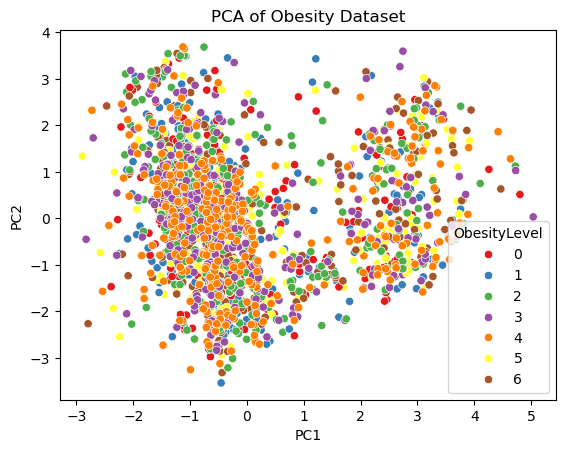

In [33]:
from sklearn.decomposition import PCA

# PCA Analysis
pca = PCA(n_components=2) # visualize high-dimensional data in 2D space 
pca_result = pca.fit_transform(X) # learns the principal components and transform dependent variables X into 2 features
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2']) # saves transformed data into a dataframe
df_pca['ObesityLevel'] = y # retains class lebels for dependent variables
sns.scatterplot(x='PC1', 
                y='PC2', 
                hue=df_pca['ObesityLevel'], 
                palette='Set1', 
                data=df_pca
                )
plt.title('PCA of Obesity Dataset')
plt.show()

The PCA Scatterplot reveals 

- There are distinct but overlapping clusters of obesity levels indicating that while PCA retains class separability, some obesity categories share similar feature distributions

- PC1 captures most of the dataset’s variance, likely representing weight, height, and dietary factors

- PC2 on the other hand is influenced by lifestyle elements like physical activity (FAF), transportation mode (MTRANS) and hydration (water intake CH2O)

- Although some obesity levels appear tightly grouped, complete isolation of categories is not observed, suggesting shared features across classes

- For classification purpose, PCA further suggests that obesity levels exhibit partial linear separability, but the presence of nonlinear relationships indicates the need for more complex models e.g., SVM, neural networks, and ensemble models like Random Forest, Gradient Boosting.

CONCLUSION FROM EDA


# Obesity Level Prediction

The function below splits the dataset into train nad test, applies an ml model to predict target variable, calculates accuracy and cross validation score.

In [34]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y # stratify = y target variable to ensure even distribution of label 
) 
    

##### Check Distribution of Target Class in Train and Test set

In [35]:
y_train.value_counts()/len(y_train)


obesityLvl
2    0.166469
4    0.153436
3    0.140403
5    0.137441
6    0.137441
1    0.135664
0    0.129147
Name: count, dtype: float64

In [36]:
y_test.value_counts()/len(y_test)

obesityLvl
2    0.165485
4    0.153664
3    0.141844
1    0.137116
6    0.137116
5    0.137116
0    0.127660
Name: count, dtype: float64

In [43]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np


# Initialize DataFrame to store results
model_df = pd.DataFrame(columns=["Model", "CV Score", "Accuracy Score", "F1 Score", "Log Loss"])


from sklearn.model_selection import train_test_split

def train_test_model(model, X, y, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and testing sets, then trains a classification model.

    Parameters:
    model : sklearn estimator  
        The machine learning model to be trained (e.g., LogisticRegression, RandomForestClassifier).
    X : array-like, shape (n_samples, n_features)  
        Feature matrix.
    y : array-like, shape (n_samples,)  
        Target labels.
    test_size : float, optional (default=0.2)  
        Proportion of the dataset to be used for testing.
    random_state : int, optional (default=42)  
        Controls the random seed for reproducibility.

    Returns:
    model : sklearn estimator  
        The trained model after fitting on the training data.
    X_train, X_test, y_train, y_test : arrays  
        Training and testing datasets.
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    return model, X_train, X_test, y_train, y_test



def predict_model(model, X_test):
    """
    Predicts labels and probabilities using a trained model.

    Parameters:
    model : sklearn estimator  
        The trained model.
    X_test : array-like, shape (n_test_samples, n_features)  
        Test dataset features.

    Returns:
    y_pred : array  
        Predicted labels.
    y_prob : array or None  
        Predicted probabilities (if supported by the model).
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    return y_pred, y_prob


def evaluate_model(model, X, y, X_test, y_test, y_pred, y_prob, cv=10):
    """
    Evaluates a trained model using various performance metrics and saves results to `model_df`

    Parameters:
    model : sklearn estimator  
        The trained model.
    X, y : array-like  
        Full dataset for cross-validation.
    X_test, y_test : array-like  
        Test dataset.
    y_pred : array  
        Predicted labels.
    y_prob : array or None  
        Predicted probabilities (or None if not supported).
    cv : int, optional (default=10)  
        Number of cross-validation folds.

    Returns:
    model_results : dict  
        Dictionary containing evaluation metrics.
    """

    global model_df  # Ensure we update the global dataframe (optimized with chatGPT)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    avg_cv_score = np.mean(cross_val_score(model, X, y, cv=cv))

    logloss = log_loss(y_test, y_prob) if y_prob is not None else None

    # Print evaluation summary
    print("\n=== Model Evaluation ===")
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {round(acc * 100, 2)}%")
    print(f"Avg Cross-Validation Score: {round(avg_cv_score * 100, 2)}%")
    print(f"F1-Score (Weighted): {round(f1 * 100, 2)}%")
    print(f"Log Loss: {round(logloss, 2) if logloss is not None else 'N/A'}\n")

    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Store results in a dictionary
    model_results = {
        "Model": model.__class__.__name__,
        "CV Score": round(avg_cv_score * 100, 2),
        "Accuracy Score": round(acc * 100, 2),
        "F1 Score": round(f1 * 100, 2),
        "Log Loss": round(logloss, 2) if logloss is not None else 'N/A'
    }

    # Append to DataFrame
    model_df = pd.concat([model_df, pd.DataFrame([model_results])], ignore_index=True)
    
    # return model_results


## Build Baseline Models

To make any prediction or build a model we must understand the type of classification required for the target dependent variables to be predicted. Our obesity dataset has labels for obesity levels encoded from 0-6 representing 7 levels of obesity ('Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III').We will require a type of classification where each record (person) belongs to only one obesity category at a time. This means that the model must choose one category out of the seven available classes in our target variable per prediction. Which is a case of multiple choice rather than a simple binary one. There are two approach to dealing with multiple values either as a multi class classifer or a multi label one. A very useful approach for this classification is a Multi-Class Classification; it ensures that each person can only have one obesity category at a time rather than a Multi label which requires that each record(person) can belong to multiple categories at the same time (i.e a person can be "Obessity type I" and "Normal weight" at the same time).

The Baseline model selected for this excercise is a special type of binary classification model (Logistic Regression) called One-vs-One classification model. Logistic Regression model is built for binary classification, but our obesity dataset is a classification task with more than two classes making default binary logistic regression models unsuitable for prediction task. The best way to utilise the logistic regression model for our dataset is to engage a heuristic method that can be used to split a multi-class classification problem into multiple binary classification datasets and train a binary classification model each. The two examples of this heauristic method include; One-vs-Rest (OvR) and One-vs-One (OvO). 

One-vs-One (OvO) splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

The Target variable to be predicted has labels ranging from 0-6 and one-vs-one will be best suited as it enables a split of one dataset for each class label. 



### Obesity Level Prediction using Logistic Regression 

Since our dataset target (Dependent) variable has 0-6 label represnting levels of obesity, we will use a OneVsOneClassifier (one-vs-one)logistic regression classification model as it is best suited for classification with such number of labels. 

how it works : the algorithm constructs one classifier per pair of classes. At prediction time, the class which received the most votes is selected. In the event of a tie (among two classes with an equal number of votes), it selects the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier


# Define the OneVsOne Classifier with Logistic Regression
model = OneVsOneClassifier(LogisticRegression(solver='liblinear', max_iter=1000))

# Train the model 
model = train_test_model(model, X_train, y_train)  # Function returns trained model
model= model[0]
# Make predictions 
y_pred, y_prob = predict_model(model, X_test)  

# Evaluate the model
evaluate_model(model, X, y, X_test, y_test, y_pred, y_prob)



=== Model Evaluation ===
Model: OneVsOneClassifier
Accuracy: 91.73%
Avg Cross-Validation Score: 92.94%
F1-Score (Weighted): 91.68%
Log Loss: N/A

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.90      0.74      0.81        58
           2       0.97      0.94      0.96        70
           3       0.97      0.97      0.97        60
           4       1.00      1.00      1.00        65
           5       0.80      0.88      0.84        58
           6       0.86      0.93      0.89        58

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.91       423
weighted avg       0.92      0.92      0.92       423



/var/folders/3k/_hn4fz3s1tgbvg_wr0kv3zy40000gn/T/ipykernel_40097/3816208925.py:117: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_df = pd.concat([model_df, pd.DataFrame([model_results])], ignore_index=True)


   Class  AUC Score (%)
0      0          98.98
1      1          95.05
2      2          98.41
3      3          99.56
4      4         100.00
5      5          95.80
6      6          97.17

The mean value for AUC Score is 0.98


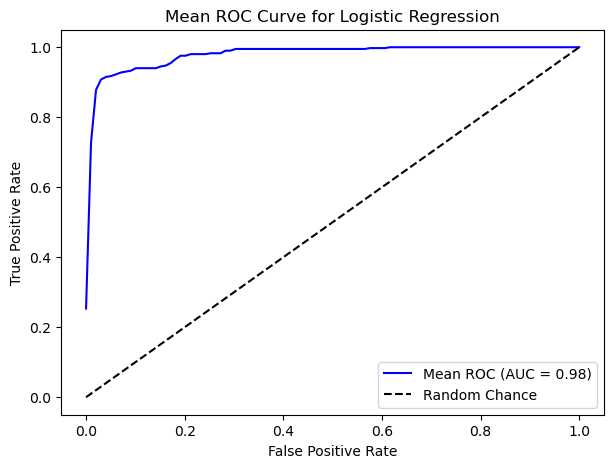

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Get decision function scores
y_score = model.decision_function(X_test)

# Compute ROC for each class
fpr_list, tpr_list, auc_list = [], [], []
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc(fpr, tpr))

# Convert AUC scores to DataFrame
auc_df = pd.DataFrame({'Class': range(y_test_bin.shape[1]), 'AUC Score': auc_list})
auc_df['AUC Score (%)'] = (auc_df['AUC Score'] * 100).round(2) # Convert 'AUC Score' to percentage and round to 2 significant figures
print(auc_df[['Class','AUC Score (%)']])

# Compute mean ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
mean_auc = np.mean(auc_list)

print(f'\nThe mean value for AUC Score is {round(mean_auc, 2)}')

# Plot mean ROC curve
plt.figure(figsize=(7, 5))
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Ensure correct function names
plt.xlabel('False Positive Rate')  # Correct
plt.ylabel('True Positive Rate')  # Correct
plt.title('Mean ROC Curve for Logistic Regression')  # Ensure full function name
plt.legend()
plt.show()


## Other Models 

### 1. Obesity Level Prediction using GradientBoosting Classifier 

Gradient boosting classifier is a Strong learner that combines weak classifiers for high accuracy and handles complex relationships well. Gradient boosting was selected as one of the algoritms to use on this dataset because the clasissifcation of obesisty levels is focused on eating habits and physical condition explanatory variables which are factors GBC captures better than linear models and learns effectively. 

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

# Train the model 
model = train_test_model(model, X_train, y_train)  # Function returns trained model
model = model[0]

# Make predictions 
y_pred, y_prob = predict_model(model, X_test)  

# Evaluate the model
evaluate_model(model, X, y, X_test, y_test, y_pred, y_prob)


=== Model Evaluation ===
Model: GradientBoostingClassifier
Accuracy: 95.98%
Avg Cross-Validation Score: 96.78%
F1-Score (Weighted): 95.98%
Log Loss: 0.14

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.90      0.95      0.92        58
           2       1.00      0.97      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      1.00      1.00        65
           5       0.93      0.88      0.90        58
           6       0.92      0.98      0.95        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



### 2. Obesity Level Prediction using Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Define the OneVsOne Classifier with Logistic Regression
model = DecisionTreeClassifier()

# Train the model 
model = train_test_model(model, X_train, y_train)  # Function returns trained model
model = model[0]

# Make predictions 
y_pred, y_prob = predict_model(model, X_test)  

# Evaluate the model
evaluate_model(model, X, y, X_test, y_test, y_pred, y_prob)


=== Model Evaluation ===
Model: DecisionTreeClassifier
Accuracy: 92.2%
Avg Cross-Validation Score: 93.75%
F1-Score (Weighted): 92.16%
Log Loss: 2.81

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.87      0.79      0.83        58
           2       1.00      0.86      0.92        70
           3       0.95      1.00      0.98        60
           4       1.00      1.00      1.00        65
           5       0.84      0.93      0.89        58
           6       0.85      0.98      0.91        58

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.93      0.92      0.92       423



### 3. Obesity Level Prediction using Random Forest Classifier
This model is good at reducing overfitting, provides feature importance, and handles non-linear relationships. For the obesity dataset, there are some non-linear relationships. Random Forest was thus selected to help manage this while predicting the levels of obesity.

In [49]:
from sklearn.ensemble import RandomForestClassifier


# Define the OneVsOne Classifier with Logistic Regression
model = RandomForestClassifier()

# Train the model 
model = train_test_model(model, X_train, y_train)  # Function returns trained model
model = model[0]

# Make predictions 
y_pred, y_prob = predict_model(model, X_test)  

# Evaluate the model
evaluate_model(model, X, y, X_test, y_test, y_pred, y_prob)



=== Model Evaluation ===
Model: RandomForestClassifier
Accuracy: 95.04%
Avg Cross-Validation Score: 95.83%
F1-Score (Weighted): 95.1%
Log Loss: 0.28

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.81      0.97      0.88        58
           2       1.00      0.96      0.98        70
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        65
           5       0.94      0.84      0.89        58
           6       0.92      0.93      0.92        58

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



### 4. Obesity Level Prediction using XGB Classifier

XGBoost (Extreme Gradient Boosting) is also another excellent choice  model for obesity level classification (multi-class classification with target values 0-6). It's parameter enables efficient and effective multi-class classification. It builds on the concepts of Gradient Boosting but optimizes speed, performance, and generalization. 

- The **multi:softmax** objective uses a softmax function to calculate the probability of each class and selects the class with the highest probability as the prediction
- The num_class parameter helps capture the number of unique target label classes.
These parameters help adjust XGBoost to cater for multi class classification. 

In [46]:
from xgboost import XGBClassifier 


# Define the model
model = XGBClassifier(objective='multi:softmax',  # for multi-class classification
    num_class=7,  # Number of unique classes (0-6)
    eval_metric='mlogloss'
    )

# Train the model 
model = train_test_model(model, X_train, y_train)  # Function returns trained model
model = model[0]

# Make predictions 
y_pred, y_prob = predict_model(model, X_test)  

# Evaluate the model
evaluate_model(model, X, y, X_test, y_test, y_pred, y_prob)


=== Model Evaluation ===
Model: XGBClassifier
Accuracy: 96.93%
Avg Cross-Validation Score: 97.39%
F1-Score (Weighted): 96.93%
Log Loss: 0.08

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.92      0.95      0.93        58
           2       1.00      0.99      0.99        70
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        65
           5       0.96      0.95      0.96        58
           6       0.92      0.98      0.95        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



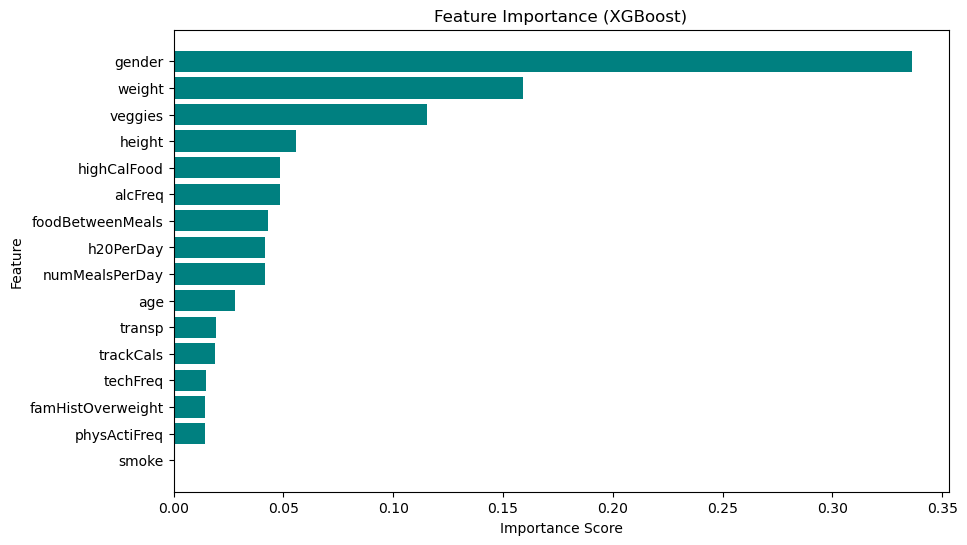

In [47]:

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (XGBoost)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


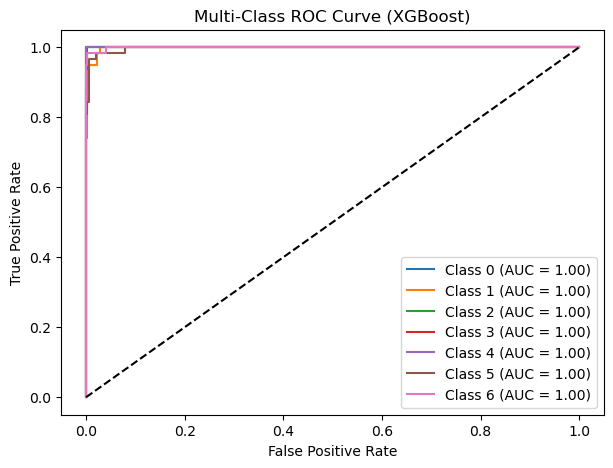

In [51]:
# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Get probability scores (not decision function)
y_score = model.predict_proba(X_test)  # Use predict_proba instead of decision_function

# Plot ROC Curves
plt.figure(figsize=(7, 5))
for i in range(y_test_bin.shape[1]):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

# Format plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (XGBoost)')
plt.legend()
plt.show()


### 5. Obesity Level Prediction using Support Vector Machines

Since the obesity dataset is relatively small, the SVM algorithm was employed as it works well for small to medium-sized datasets by using the kernel trick for complex patterns. To adjust the binary approach of SVM we employ the heuristics advantage of One-vs-One classification approach in SVM. We do this by using the parameters within SVC that covers for multi class. An examole of this will be using decision_function_shape and equating it to OVO heuristic approach. 

In [52]:
from sklearn.svm import SVC

# define and evaluate the model
model = SVC(decision_function_shape='ovo',  # One-vs-One strategy for multi-class
        random_state=42)
# Train the model 
model = train_test_model(model, X_train, y_train)  # Function returns trained model
model = model[0]

# Make predictions 
y_pred, y_prob = predict_model(model, X_test)  

# Evaluate the model
evaluate_model(model, X, y, X_test, y_test, y_pred, y_prob)




=== Model Evaluation ===
Model: SVC
Accuracy: 87.94%
Avg Cross-Validation Score: 91.05%
F1-Score (Weighted): 87.96%
Log Loss: N/A

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.76      0.67      0.72        58
           2       0.98      0.89      0.93        70
           3       0.95      1.00      0.98        60
           4       1.00      1.00      1.00        65
           5       0.70      0.79      0.74        58
           6       0.84      0.90      0.87        58

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.88      0.88      0.88       423



In [60]:
# Sort the DataFrame by 'Accuracy Score' and then 'CV Score', both in descending order
model_df.sort_values(by=['Accuracy Score', 'CV Score'], ascending=[False, False]).reset_index(drop=True)


,Model,CV Score,Accuracy Score,F1 Score,Log Loss
0,XGBClassifier,97.39,96.93,96.93,0.08
1,GradientBoostingClassifier,96.78,95.98,95.98,0.14
2,RandomForestClassifier,95.83,95.04,95.10,0.28
3,DecisionTreeClassifier,93.75,92.20,92.16,2.81
4,OneVsOneClassifier,92.94,91.73,91.68,N/A
5,SVC,91.05,87.94,87.96,N/A


XGBClassifier model performed best when compared to other models in terms of accuracy, cross validation score, log loss and F1 score. 

- **CV Score** : A 10 fold cross validation score was used to validate the model on different part of the data for test and train of datasets experimentally. FOr a 10 fold cross validation, the dataset is split in such a way that it allows for learning and training from different portion of the dataset.

- **Accuracy** : It is the ratio of correct predicted values over total predicted values. 

- **F1 Score** : This evaluation metric is commonly used in classification tasks to evaluate the performance of a model. It combines precision and recall into a single value, providing a balanced measure of a model's precision and recall

## Model Hyperparameter Tuning - Using RandomizedSearchCV

The obesity dataset has 16 features as explanatory dependent variables as such, RandomizedSearchCV is an efficient method for tuning obesity dataset hyperparameters as there are many parameters to explore. The approach ensures that we do not have to search the entire parameter space exhaustively, but still manage to find optimal or near-optimal hyperparameters within the given number of iterations.

This helps optimize the prediction of the models by ytuning the parameters, such that if the evaluationn metric scores are improved the parameter values will be adopted for the model.

In [61]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# RandomForest

rf_grid = {'n_estimators': np.arange(10,1000,10),
'max_features':['auto', 'sqrt'],
'max_depth': [None,3,5,10,20,30],
'min_samples_split':[2,5,20,50,100],
'min_samples_leaf':[1,2,5,10]
}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid,
                                n_iter=20,
                                cv=10,
                                verbose=True)

rs_rf.fit(X,y)

In [64]:
round(rs_rf.best_score_*100,2)

94.84

RandomForest had no significant change after tuning the hyperparameters 

In [ ]:
# Hyperparameter grid for XGBClassifier
xgb_grid = {
    'n_estimators': np.arange(50, 1001, 50),  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinking
    'max_depth': [3, 5, 7, 10, 12],  # Depth of trees
    'min_child_weight': [1, 3, 5, 7],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.5, 0.7, 0.8, 1.0],  # Fraction of samples used for each tree
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
    'scale_pos_weight': [1, 2, 3]  # Balance of positive and negative weights (useful for imbalanced classes)
}

# RandomizedSearchCV for XGBClassifier
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                            param_distributions=xgb_grid,
                            n_iter=20,  # Number of iterations for randomized search
                            cv=10,  # 10-fold cross-validation
                            verbose=True,  # Print progress
                            n_jobs=-1,  # Use all available processors
                            random_state=42)  # Ensure reproducibility

# Fit the model
rs_xgb.fit(X, y)

In [ ]:
from pprint import pprint

# Display the best parameters and score
pprint(f"Best Parameters: {rs_xgb.best_params_}")
print(f"\nBest Cross-validation Score: {rs_xgb.best_score_}")

("Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': "
 "350, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': "
 "0.3, 'colsample_bytree': 1.0}")

Best Cross-validation Score: 0.9701578288473577


In [ ]:
# Hyperparameter grid for GradientBoostingClassifier
gbc_grid = {
    'n_estimators': np.arange(50, 1001, 50),  # Number of boosting tree rounds 
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinking
    'max_depth': [3, 5, 7, 10, 12],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20, 50],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples required at a leaf node
    'subsample': [0.5, 0.7, 0.8, 1.0],  # Fraction of samples used for each tree
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'loss': ['deviance', 'exponential']  # Loss function: 'deviance' for logistic, 'exponential' for AdaBoost-like
}

# RandomizedSearchCV for GradientBoostingClassifier
rs_gbc = RandomizedSearchCV(GradientBoostingClassifier(),
                            param_distributions=gbc_grid,
                            n_iter=20,  # Number of iterations for randomized search
                            cv=10,  # 10-fold cross-validation
                            verbose=True,  # Print progress
                            n_jobs=-1,  # Use all available processors
                            random_state=42)  # Ensure reproducibility

# Fit the model
rs_gbc.fit(X, y)

In [ ]:
# Display the best parameters and score
print(f"Best Parameters: {rs_gbc.best_params_}")
print(f"Best Cross-validation Score: {rs_gbc.best_score_}")

Tuning hyperparameters does not result to any significant change in the model evaluation outcomes

## Reverse Feature Elimination or Backward Selection 

Ranks features based on importance and eliminates the ones that are less important 


To further improve the XGBoost model we can employ RFE for feature importance ranking and predict based on top 10 important features

In [67]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# create RFE object to rank each feature 
model = XGBClassifier(objective='multi:softmax',  # for multi-class classification
    num_class=7,  # Number of unique classes (0-6)
    eval_metric='mlogloss'
    )
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df, y)

ranking_df = pd.DataFrame()
ranking_df['Feature_name']= df.columns
ranking_df['Rank'] = rfe.ranking_
ranked = ranking_df.sort_values(by=['Rank'])
ranked 

,Feature_name,Rank
16,NObeyesdad,1
14,CALC,2
3,Weight,3
6,FCVC,4
8,CAEC,5
2,Height,6
0,Gender,7
10,CH2O,8
12,FAF,9
1,Age,10


After ranking, the features with top level of importance are features around eating habits, demography and a single feature from physical condition(TUE)

In [68]:
from sklearn.utils import shuffle
from xgboost import XGBClassifier

# Ensure 'NObeyesdad' is included in the DataFrame
cols = ranked['Feature_name'][:10].tolist()  # Select top 10 features

# Create a new DataFrame with selected features
df1 = df[cols]

# Shuffle dataset
df1 = shuffle(df1, random_state=42)

# Split features (X) and target (y)
X = df1.drop('NObeyesdad', axis=1)  # Predictor variables
y = df1['NObeyesdad']  # Target variable

# Ensure X_train and X_test have the same columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost model
model = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train model
model = train_test_model(model, X_train, y_train)  
model = model[0]

# Make predictions
y_pred, y_prob = predict_model(model, X_test)

# Evaluate model
evaluate_model(model, X_train, y_train, X_test, y_test, y_pred, y_prob)



=== Model Evaluation ===
Model: XGBClassifier
Accuracy: 93.85%
Avg Cross-Validation Score: 96.74%
F1-Score (Weighted): 93.89%
Log Loss: 0.19

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.78      1.00      0.88        47
           2       0.94      0.97      0.96        67
           3       0.95      0.97      0.96        59
           4       1.00      0.95      0.98        65
           5       0.98      0.81      0.89        69
           6       0.92      0.93      0.93        60

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



There is no significant change in performance after using Top 10 best features. XGBoost performs regardless of feature reduction

# References:

- Sklearn one-vs-one Logistice regression classification algoritm : https://scikit-learn.org/stable/modules/multiclass.html#ovo-classification
- Feature Scaling : https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/?ref=header_outind
- Logistic Regression for multi class : https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

